In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Gene scores from latest GWAS
* GWAS on AD by [Bellenguez et al 2022](https://www.nature.com/articles/s41588-022-01024-z)
* gene-level scores calculated with [Pascal](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004714)

In [2]:
fpath = '../../results/2022-08-11-pascal/output/35379992-GCST90027158-MONDO_0004975-Build38-corrected.f.tsv.sum.genescores.txt'
dtype = {'start': np.int64, 'end': np.int64, 'gene_id': str}
scores = pd.read_csv(fpath, sep='\t', index_col='gene_symbol', dtype=dtype)

In [3]:
def geneset2df(name='knowledge',
               fpath='../../results/2021-07-01-high-conf-ADgenes/AD-genes-knowledge-extended',
               scores=scores):
    with open(fpath) as f:
        l = f.readlines()
    l = [x.rstrip() for x in l]
    df = pd.DataFrame({name: 1}, index=l)
    todrop = df.index.difference(scores.index)
    print(len(todrop), 'removed from', name, todrop.to_list())
    df = df.drop(todrop)
    return(df)

args = [
    ('knowledge', '../../results/2021-07-01-high-conf-ADgenes/AD-genes-knowledge-extended'),
    ('TWAS', '../../results/2021-07-01-high-conf-ADgenes/AD-genes-TWAS'),
    ('TWAS2+', '../../results/2021-07-01-high-conf-ADgenes/AD-genes-TWAS2plus'),
    ('agora', '../../resources/agora/AD-genes-agora'),
    ('agora2+', '../../resources/agora/AD-genes-agora-2plus-nominations'),
    ('DESudhir', '../../resources/CMap/sudhir-varma/up-down.genes-noNAs'),
    ('AD DE APOE3-APOE3', '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-apoe3-apoe3'),
    ('AD DE APOE4-APOE4', '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-apoe4-apoe4'),
    ('APOE3-4 DE neuron', '../../results/2021-12-08-apoe-de-genes-tunahan/Neuron-apoe-de'),
    ('APOE3-4 DE astrocyte', '../../results/2021-12-08-apoe-de-genes-tunahan/Astrocyte-apoe-de'),
    ('APOE3-4 DE microglia', '../../results/2021-12-08-apoe-de-genes-tunahan/Microglia-like-apoe-de'),
    ('rMTA-APOE3-4', '../../results/2022-02-25-dilara-rmta-geneset/rmta-apoe3-apoe4'),
]
genesets = [geneset2df(*a) for a in args]

2 removed from knowledge ['MT-ND1', 'MT-ND2']
24 removed from TWAS ['AC087500.1', 'AC099524.1', 'AL512631.1', 'APOC4', 'CCNT2-AS1', 'CTB-129P6.11', 'CTD-2380F24.1', 'ENSG00000260911', 'ENSG00000270081.1', 'FAM115D', 'HLA-DQA1', 'HLA-DQA2', 'HLA-DQB2', 'HLA-DRA', 'HLA-DRB1', 'MS4A4E', 'NECTIN2', 'RNA5SP156', 'RP11-385F7.1', 'SIGLEC22P', 'TSPOAP1-AS1', 'X84075', 'ZNF222', 'ZNF232-AS1']
8 removed from TWAS2+ ['APOC4', 'CTB-129P6.11', 'HLA-DQA1', 'HLA-DQA2', 'HLA-DRA', 'HLA-DRB1', 'MS4A4E', 'NECTIN2']
42 removed from agora ['AIFM1', 'AL049840.1', 'ATP5PO', 'CLIC1', 'CNKSR2', 'CNTNAP2', 'CSMD1', 'DDAH2', 'DLG2', 'ERBB4', 'FRMPD4', 'GPC5', 'GPM6B', 'GRAMD2B', 'GUCY1B1', 'HCP5', 'HLA-DRA', 'HSPB2', 'MOG', 'MRPL12', 'MRPL53', 'MRPL57', 'MRPL58', 'MSN', 'NDUFA13', 'NIPSNAP2', 'NONO', 'NRXN3', 'PDHA1', 'PHF24', 'PLP1', 'PLPPR4', 'PPP1R18', 'RENBP', 'RTF2', 'SEPT5', 'SLC5A3', 'SLITRK4', 'SYN1', 'SYNGAP1', 'SYP', 'TOMM70']
4 removed from agora2+ ['CLIC1', 'CSMD1', 'MSN', 'SYNGAP1']
38 removed from

In [4]:
results = pd.concat([scores] + genesets, axis=1).sort_values('pvalue')
results.to_csv('../../results/2022-08-11-pascal/results.csv')
results['rank'] = np.arange(results.shape[0]) + 1
results.head(10)

,chromosome,start,end,strand,gene_id,numSnps,pvalue,Status,knowledge,TWAS,...,agora,agora2+,DESudhir,AD DE APOE3-APOE3,AD DE APOE4-APOE4,APOE3-4 DE neuron,APOE3-4 DE astrocyte,APOE3-4 DE microglia,rMTA-APOE3-4,rank
CYB561,chr17,61509664,61523722,-,1534,97,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
IGSF23,chr19,45116939,45140081,+,147710,204,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
PVR,chr19,45147097,45169428,+,5817,239,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
CLASRP,chr19,45542297,45574214,+,11129,247,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
RELB,chr19,45504706,45541456,+,5971,212,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
CLPTM1,chr19,45457841,45496604,+,1209,193,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
APOC2,chr19,45451541,45452652,+,344,141,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
MIR4531,chr19,45156955,45157002,-,100616355,182,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
CEACAM19,chr19,45174723,45187627,+,56971,212,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
CEACAM16,chr19,45202420,45213986,+,388551,183,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


['named-figure/Pascal-gene-pval-geneset-membership.png',
 'named-figure/Pascal-gene-pval-geneset-membership.pdf']

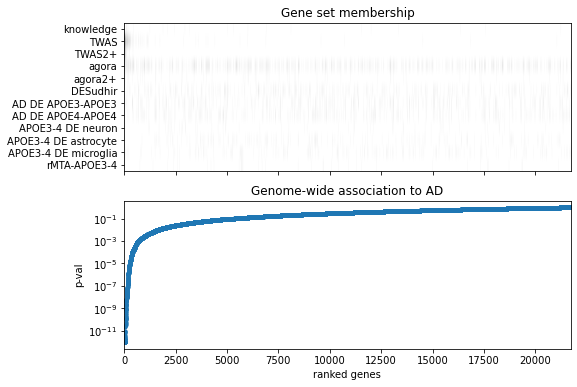

In [5]:
def myimplot(left=None, right=None):
    fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    m = np.transpose(results[[x[0] for x in args]].fillna(0).to_numpy())
    ax[0].imshow(m, aspect='auto', cmap='gray_r', vmin=0, vmax=1)
    ax[0].set_xlim(left=left, right=right)
    ax[0].set_yticks(range(len(args)))
    ax[0].set_yticklabels([x[0] for x in args])
    ax[0].set_title('Gene set membership')
    if right is not None and right <= 50:
        ax[1].set_xticks(list(np.arange(right + 1, dtype=np.float64)))
        ax[1].set_xticklabels(results.index[:right + 1], rotation=90)
        ax[0].grid(axis='x')
        ax[1].grid(axis='x')
    ax[1].scatter(x='rank', y='pvalue', marker='.', data=results)
    ax[1].set_yscale('log')
    ax[1].set_xlabel('ranked genes')
    ax[1].set_ylabel('p-val', rotation=90)
    ax[1].set_xlim(left=left, right=right)
    ax[1].set_title('Genome-wide association to AD')
    return((fig, ax))

fig, ax = myimplot(right=None)
attila_utils.savefig(fig, 'Pascal-gene-pval-geneset-membership')

['named-figure/Pascal-top1000-gene-pval-geneset-membership.png',
 'named-figure/Pascal-top1000-gene-pval-geneset-membership.pdf']

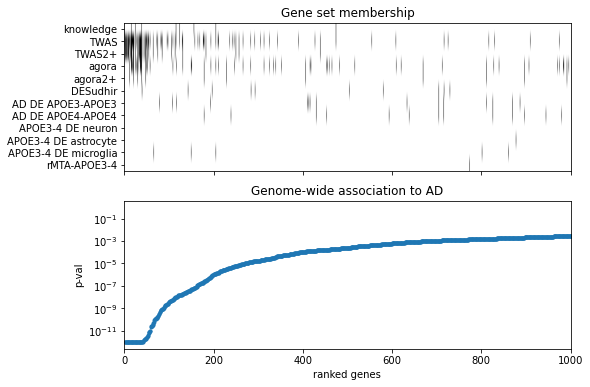

In [6]:
fig, ax = myimplot(right=1000)
attila_utils.savefig(fig, 'Pascal-top1000-gene-pval-geneset-membership')

['named-figure/Pascal-top40-gene-pval-geneset-membership.png',
 'named-figure/Pascal-top40-gene-pval-geneset-membership.pdf']

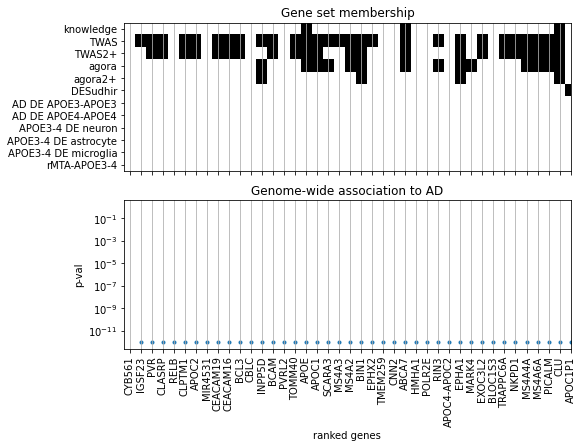

In [7]:
fig, ax = myimplot(right=40)
attila_utils.savefig(fig, 'Pascal-top40-gene-pval-geneset-membership')

['named-figure/Pascal-gene-pval-geneset-membership-v2.png',
 'named-figure/Pascal-gene-pval-geneset-membership-v2.pdf']

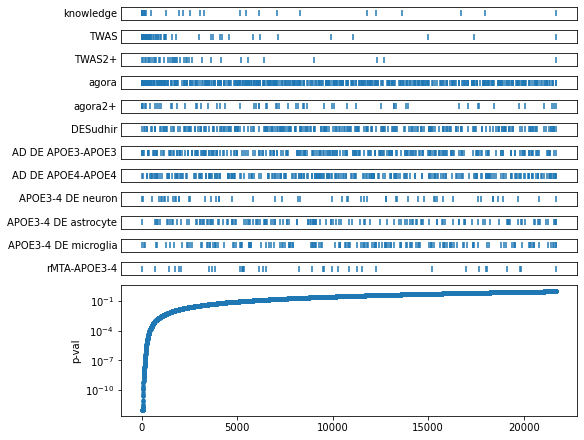

In [8]:
def myplot(left=None, right=None):
    fig = plt.figure(constrained_layout=True, figsize=(8, 6))
    heights = [1] * len(args) + [10]
    spec = fig.add_gridspec(ncols=1, nrows=len(args) + 1, height_ratios=heights)
    axi = fig.add_subplot(spec[len(args)])
    axi.scatter(x='rank', y='pvalue', marker='.', data=results)
    axi.set_yscale('log')
    axi.set_ylabel('p-val', rotation=90)
    axi.set_xlim(left=left, right=right)
    if right is not None and right <= 50:
        axi.set_xticks(list(np.arange(right + 1, dtype=np.float64)))
        axi.set_xticklabels(results.index[:right + 1], rotation=90)
    for i, arg in enumerate(args):
        name = arg[0]
        ax = fig.add_subplot(spec[i])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel(name, rotation=0, horizontalalignment='right', verticalalignment='center')
        ax.scatter(x='rank', y=name, marker='|', data=results)
        ax.set_xlim(left=left, right=right)
    return(fig)

fig = myplot(right=None)
attila_utils.savefig(fig, 'Pascal-gene-pval-geneset-membership-v2')

['named-figure/Pascal-top1000-gene-pval-geneset-membership-v2.png',
 'named-figure/Pascal-top1000-gene-pval-geneset-membership-v2.pdf']

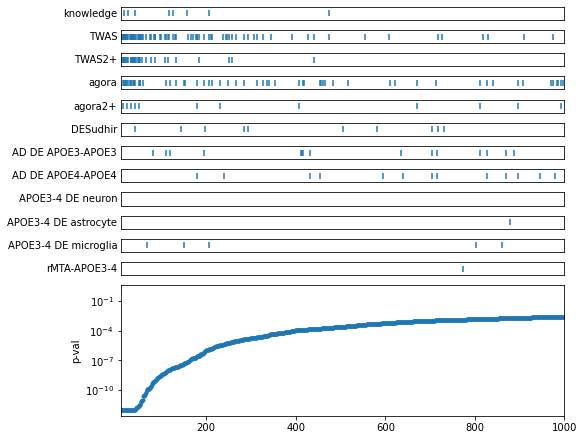

In [9]:
fig = myplot(left=10, right=1000)
attila_utils.savefig(fig, 'Pascal-top1000-gene-pval-geneset-membership-v2')

['named-figure/Pascal-top40-gene-pval-geneset-membership-v2.png',
 'named-figure/Pascal-top40-gene-pval-geneset-membership-v2.pdf']

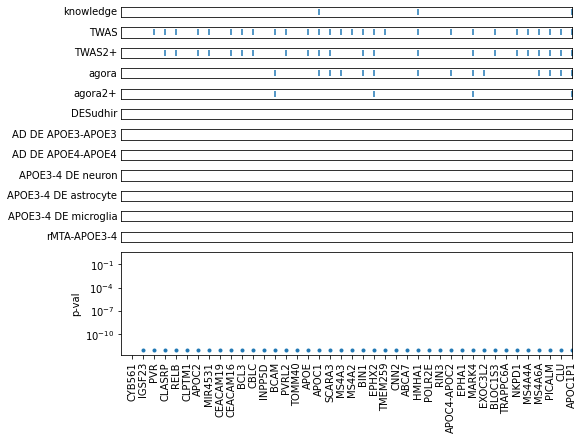

In [10]:
fig = myplot(left=-1, right=40)
attila_utils.savefig(fig, 'Pascal-top40-gene-pval-geneset-membership-v2')

In [11]:
%connect_info

{
  "shell_port": 51457,
  "iopub_port": 51458,
  "stdin_port": 51459,
  "control_port": 51461,
  "hb_port": 51460,
  "ip": "127.0.0.1",
  "key": "388b6b0c-29aac68f488f3bf70c692be8",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-123771e0-e72f-40d3-b16f-454bbd1f917b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
